# ---------------------MNIST DATA CLASSIFICATION PYTORCH---------------------

##### Import required packages:

In [ ]:
# Import packages 
import os 
import torch 
import torch.nn as nn
from torch.autograd import Variable 
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim 

### Define  hyperparameters:
##### Keep in Mind that there is difference in parameters and hyperparameters

In [78]:
n_epochs =2
batch_size=100
learning_rate =0.01
momentum =0.9
log_interval =10

random_seed =2046
torch.backends.cudnn.enabled =False
torch.manual_seed(random_seed)

##### Download and Load the dataset from torch library: 

In [70]:
### Laod MNIST Dataset
use_cuda= torch.cuda.is_available()
print ( use_cuda)

False


In [71]:
root = './data'
if not os.path.exists(root):
    os.mkdir(root)

##### Normaized datset:

In [72]:
### Torch Vision offers a lot of transformation, such as cropping or normalization 
trans_norm= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(1.0,))])

In [73]:
train_set = datasets.MNIST(root=root, train =True, transform =trans_norm, download= True)
test_set = datasets.MNIST(root=root, train =False, transform =trans_norm, download= True)

In [74]:
print (len(train_set))
print (len(test_set))

60000
10000


In [75]:
#Define the batch size
batch_size= 100

## load the dataset
#Data loader. Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset.
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size= batch_size, shuffle= True)
test_loader= torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

print ('Total Training Batch Number: {}'.format(len(train_loader)))
print ('Total Test Batch Number: {}'.format(len(test_loader)))

Total Training Batch Number: 600
Total Test Batch Number: 100


### Visualize additional features of DataLoader:

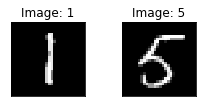

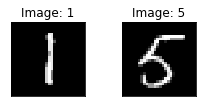

In [79]:
### DataLoader also contains other features. One of the example is,
examples =enumerate(train_loader)
batch_idx, (example_data,example_targets)= next(examples)

example_data.shape
# This gives train data batch is a tensor of shape : 4 [100, 1, 28, 28]. 
#This means we have 100 examples of 28*28 pixels in grayscale. Lets plot this on matplotlib

import matplotlib.pyplot as plt 
%matplotlib inline

fig = plt.figure()
for i in range (n_epochs):
    plt.subplot(2,4,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap= 'gray', interpolation ='none')
    plt.title("Image: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

### Build the Neural Network:

In [80]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1= nn.Linear(28*28, 500)
        self.fc2=nn.Linear(500,256)
        self.fc3=nn.Linear(256,10)
    
    def forward(self, x):
        x=x.view(-1, 28*28)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x)
    
    def name(self):
        return "Net"

### Initialize the network and the optimizer:

In [93]:
model =Net()

if use_cuda:
    model= model.cuda()

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
criterion = nn.CrossEntropyLoss()

### Training the Model:

##### Steps:
  1. Make sure Network is in training mode.
  2. Iterate over all training data per epoch. 
  3. Batch Loading is handled by DataLaoder. 
  4. Do not Forget to maually set gradient to zero using optimizer.zero_grad(). This is the most common mistake in neural net. 
  5. Produce the output of Network (Forward Pass). 
  6. Compute negative lg-likelihood loss (or you can choose you or loss function depending on the nature of problem).
  7. Backward Propagation backward() collect the new set of gradients which is propagate back into each parameters using otimizer.step().
  8. Plot the training and test lossess.

In [82]:
train_losses =[]
test_losses = []
train_conter =[]
test_counter =[i*len(train_loader.dataset) for i in range(n_epochs +1)]

In [114]:
## Run the main training loop 
for epoch in range(n_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        data = data.view(-1, 28*28) # resize data from (100,1,28,28) to (100, 28*28)
        optimizer.zero_grad()
        net_out = model(data)
        loss =criterion(net_out, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval ==0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch,batch_idx * len(data),len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.item()))

C:\Users\Biswash\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Train Epoch: 0 [0/60000 (0%)]	Loss: 0.058788
Train Epoch: 0 [1000/60000 (2%)]	Loss: 0.061251
Train Epoch: 0 [2000/60000 (3%)]	Loss: 0.108006
Train Epoch: 0 [3000/60000 (5%)]	Loss: 0.091014
Train Epoch: 0 [4000/60000 (7%)]	Loss: 0.038708
Train Epoch: 0 [5000/60000 (8%)]	Loss: 0.029328
Train Epoch: 0 [6000/60000 (10%)]	Loss: 0.095801
Train Epoch: 0 [7000/60000 (12%)]	Loss: 0.046238
Train Epoch: 0 [8000/60000 (13%)]	Loss: 0.090315
Train Epoch: 0 [9000/60000 (15%)]	Loss: 0.036589
Train Epoch: 0 [10000/60000 (17%)]	Loss: 0.039639
Train Epoch: 0 [11000/60000 (18%)]	Loss: 0.030237
Train Epoch: 0 [12000/60000 (20%)]	Loss: 0.025461
Train Epoch: 0 [13000/60000 (22%)]	Loss: 0.024811
Train Epoch: 0 [14000/60000 (23%)]	Loss: 0.093226
Train Epoch: 0 [15000/60000 (25%)]	Loss: 0.092251
Train Epoch: 0 [16000/60000 (27%)]	Loss: 0.038741
Train Epoch: 0 [17000/60000 (28%)]	Loss: 0.074864
Train Epoch: 0 [18000/60000 (30%)]	Loss: 0.067877
Train Epoch: 0 [19000/60000 (32%)]	Loss: 0.072920
Train Epoch: 0 [200

### Testing the Network:

In [116]:
test_loss = 0 
correct = 0 
for data, target in test_loader: 
    data, target = Variable(data), Variable(target)
    data =data.view(-1, 28*28)
    net_out = model(data)
    
    test_loss += criterion(net_out, target).item()
    pred = net_out.data.max(1)[1]
    correct += pred.eq(target.data).sum()
test_loss /= len(test_loader.dataset)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

C:\Users\Biswash\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]



Test set: Avg. loss: 0.0008, Accuracy: 9758/10000 (97%)

